# Алгоритм LZW

In [6]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        dictionary = []
        for i in text:
            if i not in dictionary:
                dictionary.append(i)
        current = text[0]
        output = ''

        for i in range(1, len(text)):
            temp = text[i]

            if current + temp in dictionary:
                current = current + temp
            else:
                output += str(dictionary.index(current)) + ' '
                dictionary.append(current + temp)
                current = temp

        output += str(dictionary.index(current))

        return output, dictionary

    def decode(self, code: str, coding_dict: list) -> str:
        code = code.split(' ')
        code = [int(i) for i in code]
        current = code[0]
        output = coding_dict[current]

        i = 1
        while i < len(code):
            temp = code[i]
            if temp >= len(coding_dict):
                string = coding_dict[current]
                string = string + coding_dict[current][0]
            else:
                string = coding_dict[temp]

            output += string
            coding_dict.append(coding_dict[current] + string[0])
            current = temp
            i += 1

        return output
    
    @staticmethod
    def _text2list(text: str) -> list:
        output = []
        text = text.lstrip('[')
        while text != ']':
            temp = text[:text.find(')')]
            o, temp = int(temp[1:temp.find(',')]), temp[temp.find(',')+1:]
            l, temp = int(temp[:temp.find(',')]), temp[temp.find(',')+1:]
            m = temp.strip()[1]
            tup = (o, l, m)
            output.append(tup)
            text = text[1:][text[1:].find('('):]
        return output

    @staticmethod
    def _list2text(text: list) -> str:
        return str(text)

In [ ]:
lzw = LZW()
a = lzw.encode('hello world abcabbca')
print(a)
print(lzw.decode(a[0], a[1]))

('0 1 2 2 3 4 5 3 6 2 7 4 8 9 10 23 24 8', ['h', 'e', 'l', 'o', ' ', 'w', 'r', 'd', 'a', 'b', 'c', 'he', 'el', 'll', 'lo', 'o ', ' w', 'wo', 'or', 'rl', 'ld', 'd ', ' a', 'ab', 'bc', 'ca', 'abb', 'bca'])
hello world abcabbca


In [3]:
import random
import string
def str_generator(num):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(num))

In [ ]:
lzw = LZW()
def testing():
    for n in range(10, 18):
        n = 2 ** n
        print(">>> Testing string size:", n)
        message = str_generator(n)
        enc = lzw.encode(message)
        assert lzw.decode(enc[0], enc[1]) == message
        print('Success!')
testing()

>>> Testing string size: 1024
Success!
>>> Testing string size: 2048
Success!
>>> Testing string size: 4096
Success!
>>> Testing string size: 8192
Success!
>>> Testing string size: 16384
Success!
>>> Testing string size: 32768
Success!
>>> Testing string size: 65536
Success!
>>> Testing string size: 131072
Success!


In [11]:
import time
import matplotlib.pyplot as plt

lzw = LZW()
def lzw_plot():

    performance = []
    lengths = list(range(1, 10000, 100))

    for i in lengths:
        string = str_generator(i)
        start = time.perf_counter()
        lzw.encode(string)
        end = time.perf_counter()

        performance.append(end-start)
    return lengths, performance

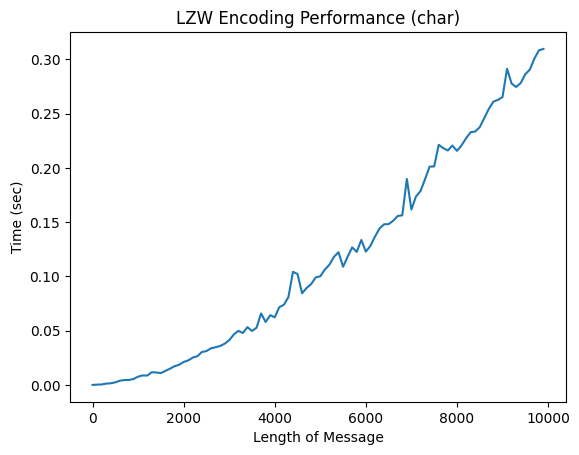

In [ ]:
x, y = lzw_plot()
plt.plot(x, y)
plt.xlabel('Length of Message')
plt.ylabel('Time (sec)')
plt.title('LZW Encoding Performance (char)')
plt.show()

In [13]:
def lzw_enc():

    lengths = list(range(1, 1000))
    data = [str_generator(i) for i in lengths]
    res = [LZW().encode(i) for i in data]

    return data, res

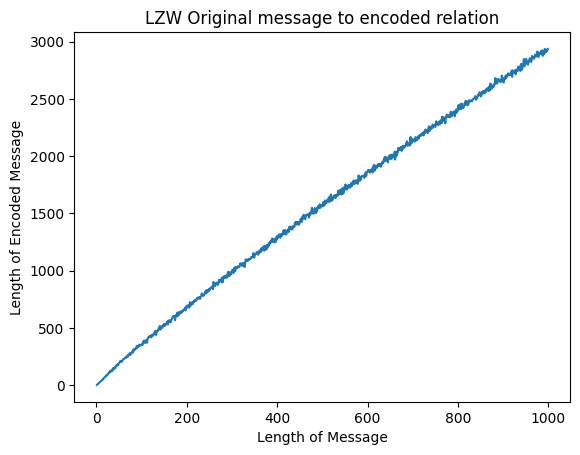

In [15]:
x, y = lzw_enc()
x = [len(i) for i in x]
y = [len(i[0])+len(i[1]) for i in y]
plt.plot(x, y)
plt.xlabel('Length of Message')
plt.ylabel('Length of Encoded Message')
plt.title('LZW Original message to encoded relation')
plt.show()

### Алгоритм LZW

Алгоритм LZW (Lempel-Ziv-Welch) - це метод стиснення даних, який використовує словниковий метод для заміни послідовностей символів на короткі коди. 

#### Робота алгоритму:

1. **Кодування**:
   - Спочатку створюється словник, який містить всі символи, що зустрічаються в вихідному тексті.
   - Послідовно обробляються символи вхідного тексту.
   - Комбінації символів об'єднуються в ланцюжки, які вже є в словнику. Якщо такий ланцюжок є, він зберігається як поточний.
   - Якщо ланцюжок не знайдено, він додається до вихідного потоку і словника, а поточний символ стає першим символом нового ланцюжка.
   - Кожен знайдений ланцюжок кодується за допомогою його індексу в словнику.

2. **Декодування**:
   - Закодований текст розбивається на кодовані цифри.
   - Цифри відповідають індексам символів у словнику.
   - Для кожної цифри відновлюється вихідний ланцюжок за допомогою словника.
   - Відновлені ланцюжки об'єднуються, щоб отримати вихідний текст.

#### Висновок:

Алгоритм LZW є ефективним методом стиснення даних, який може добре працювати з послідовностями, які містять багато повторюваних ланцюжків. Він добре підходить для стиснення текстових даних та фото, а також інших форматів з великою кількістю повторюваних фрагментів. Проте він може бути менш ефективним для вхідних даних з низьким рівнем повторень.
